In [1]:
from ni_eeg_forward_project.util import get_labels_of_points
from neurolib.models.eeg import EEGModel
import mne
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
from neurolib.utils.collections import dotdict
import numpy as np

In [2]:
fname = "../../neurolib/data/datasets/eeg_fsaverage/fsaverage_fwd_sol/fsaverage_default-fwd.fif"
fwd = mne.read_forward_solution(fname)

Reading forward solution from /Users/martin/Documents/Uni_MSc/Semester04/ni_project/neurolib/ni_eeg_forward_project/playground_dev/../../neurolib/data/datasets/eeg_fsaverage/fsaverage_fwd_sol/fsaverage_default-fwd.fif...
    Reading a source space...
    [done]
    1 source spaces read
    Desired named matrix (kind = 3523) not available
    Read EEG forward solution (14629 sources, 94 channels, free orientations)
    Source spaces transformed to the forward solution coordinate frame


In [3]:
print(fwd.keys())
fwd['src'][0].keys()

dict_keys(['source_ori', 'coord_frame', 'nsource', 'nchan', 'sol', '_orig_sol', 'sol_grad', 'mri_head_t', 'info', 'src', 'source_rr', '_orig_source_ori', 'source_nn', 'surf_ori'])


dict_keys(['id', 'type', 'shape', 'src_mri_t', 'mri_ras_t', 'vox_mri_t', 'mri_width', 'mri_height', 'mri_depth', 'mri_volume_name', 'neighbor_vert', 'np', 'ntri', 'coord_frame', 'rr', 'nn', 'tris', 'nuse', 'inuse', 'vertno', 'nuse_tri', 'use_tris', 'nearest', 'nearest_dist', 'pinfo', 'patch_inds', 'dist', 'dist_limit', 'subject_his_id'])

In [4]:
lh = fwd['src'][0]
dip_pos = lh['rr'][lh['vertno']]  # The position of the dipoles
dip_ori = lh['nn'][lh['vertno']]
print(dip_pos.shape)

(14629, 3)


In [6]:
leadfield = fwd['sol']['data']

In [7]:
leadfield.shape

(94, 43887)

In [8]:
43887/14629   # maybe x-y-z-contributions?

3.0

In [9]:
print(dip_pos.shape)

(14629, 3)


In [10]:
dip_pos = dip_pos*1e3   # ARE COORDINATES DEFINED IN m IN MNE???

In [11]:
points_found, label_codes, label_strings = get_labels_of_points(dip_pos, atlas="aal2")
if not np.all(points_found):
    print("Not all sources were assigned to regions.")

print(label_codes.shape)

ERROR:root:The atlas does not specify an assignment for the given MNI-coordinate.
ERROR:root:The atlas does not specify an assignment for the given MNI-coordinate.
ERROR:root:The atlas does not specify an assignment for the given MNI-coordinate.
ERROR:root:The atlas does not specify an assignment for the given MNI-coordinate.
ERROR:root:The atlas does not specify an assignment for the given MNI-coordinate.
ERROR:root:The atlas does not specify an assignment for the given MNI-coordinate.
ERROR:root:The atlas does not specify an assignment for the given MNI-coordinate.
ERROR:root:The atlas does not specify an assignment for the given MNI-coordinate.
ERROR:root:The atlas does not specify an assignment for the given MNI-coordinate.
ERROR:root:The atlas does not specify an assignment for the given MNI-coordinate.
ERROR:root:The atlas does not specify an assignment for the given MNI-coordinate.
ERROR:root:The atlas does not specify an assignment for the given MNI-coordinate.
ERROR:root:The a

Not all sources were assigned to regions.
(14629,)


In [12]:
sum(points_found)

14236

In [13]:
14629 - 14236

393

In [14]:
not_found_indices = np.where(np.array(points_found) == False)

In [15]:
not_found_indices[0].shape

(393,)

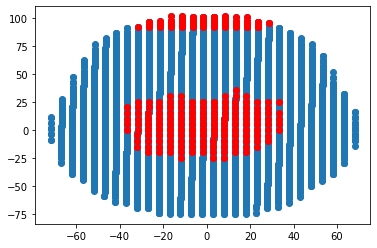

In [16]:
# plot only points that were not captured by atlas
plt.plot(dip_pos[:, 0], dip_pos[:, 1], 'o')
plt.plot(dip_pos[not_found_indices[0], 0], dip_pos[not_found_indices[0], 1], 'ro')

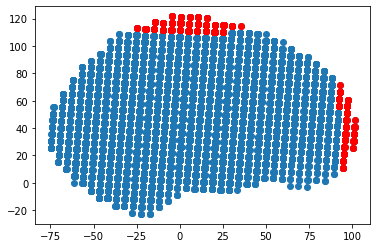

In [17]:
# plot only points that were not captured by atlas
plt.plot(dip_pos[:, 1], dip_pos[:, 2], 'o')
plt.plot(dip_pos[not_found_indices[0], 1], dip_pos[not_found_indices[0], 2], 'ro')

In [18]:
from ni_eeg_forward_project.util import plot_glassbrain_projections

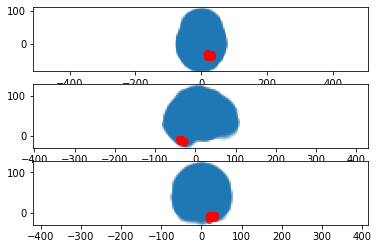

In [22]:
plot_glassbrain_projections(fwd, label_codes, 4112, "");